In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("discordbot/logs/confusion_data_optimized_2025-06-01_02-21-24.csv")
df.head()

,message,actual_abuse_type,predicted_abuse_type,actual_fraud_subtype,predicted_fraud_subtype,predicted_severity,predicted_reason,predicted_confidence
0,"Good evening, everyone. I wanted to share some...",NaN,NaN,NaN,NaN,low,The message is informative and promotes a cult...,0.95
1,"Hey everyone, just saw this interesting articl...",NaN,NaN,NaN,NaN,low,The message is informative and encourages disc...,0.95
2,@Mods HELP! My account got hacked and all my a...,fraud,NaN,account_theft,NaN,medium,The user is reporting a potential account thef...,0.90
3,Sure thing! If you're looking for a reliable c...,NaN,NaN,NaN,NaN,low,The message is informative and encourages help...,0.95
4,Hey fam! Just finished up this sick code edito...,fraud,spam,fake_links,NaN,medium,"The use of a shortened link can be suspicious,...",0.75


In [9]:
# Replace NaN with the string "none"
df = df.fillna("none")
df.head()

,message,actual_abuse_type,predicted_abuse_type,actual_fraud_subtype,predicted_fraud_subtype,predicted_severity,predicted_reason,predicted_confidence
0,"Good evening, everyone. I wanted to share some...",none,none,none,none,low,The message is informative and promotes a cult...,0.95
1,"Hey everyone, just saw this interesting articl...",none,none,none,none,low,The message is informative and encourages disc...,0.95
2,@Mods HELP! My account got hacked and all my a...,fraud,none,account_theft,none,medium,The user is reporting a potential account thef...,0.90
3,Sure thing! If you're looking for a reliable c...,none,none,none,none,low,The message is informative and encourages help...,0.95
4,Hey fam! Just finished up this sick code edito...,fraud,spam,fake_links,none,medium,"The use of a shortened link can be suspicious,...",0.75


In [10]:
# Create a confusion matrix
confusion_matrix = pd.crosstab(df["actual_abuse_type"], df["predicted_abuse_type"], 
                              rownames=["Actual"], colnames=["Predicted"], margins=True)

# Display the confusion matrix
print(confusion_matrix)

Predicted      fraud  harassment  inappropriate  none  spam  All
Actual                                                          
fraud            109           1              0    17     5  132
harassment         0          33              1     2     0   36
inappropriate      2           1             11    20     0   34
none               3           0              0   167     0  170
spam              19           0              1    10    15   45
All              133          35             13   216    20  417


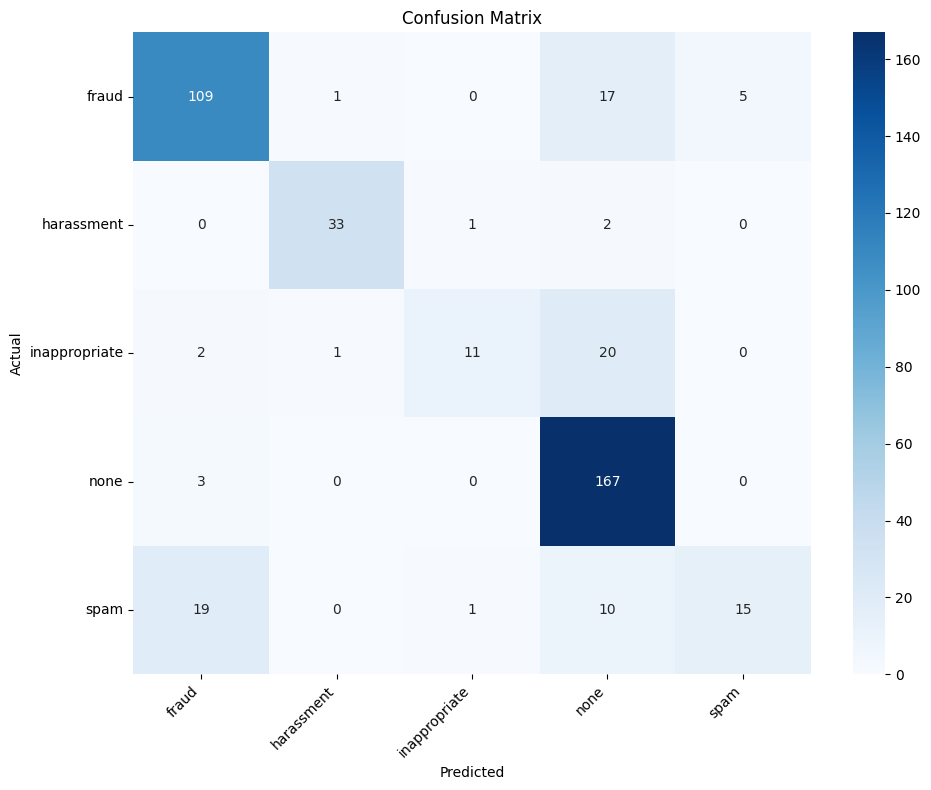

In [11]:
# Create a prettier confusion matrix with matplotlib and sklearn
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Get unique classes
classes = sorted(df['actual_abuse_type'].unique())

# Create confusion matrix
cm = confusion_matrix(df['actual_abuse_type'], df['predicted_abuse_type'], labels=classes)

# Create figure and axis
plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes,
            yticklabels=classes)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

In [16]:
# Create a confusion matrix
confusion_matrix = pd.crosstab(df["actual_fraud_subtype"], df["predicted_fraud_subtype"], 
                              rownames=["Actual"], colnames=["Predicted"], margins=True)

# Display the confusion matrix
print(confusion_matrix)

Predicted      account_theft  crypto_scam  fake_giveaway  fake_links  \
Actual                                                                 
account_theft              4            1              0           0   
crypto_scam                0           15              4           2   
fake_giveaway              0            0             26           0   
fake_links                 0            0              1          21   
impersonation              0            2              1           1   
none                       0           11              5           6   
phishing                   0            0              1           8   
All                        4           29             38          38   

Predicted      impersonation  none  phishing  All  
Actual                                             
account_theft              0     6         4   15  
crypto_scam                0     2         3   26  
fake_giveaway              0     1         0   27  
fake_links         

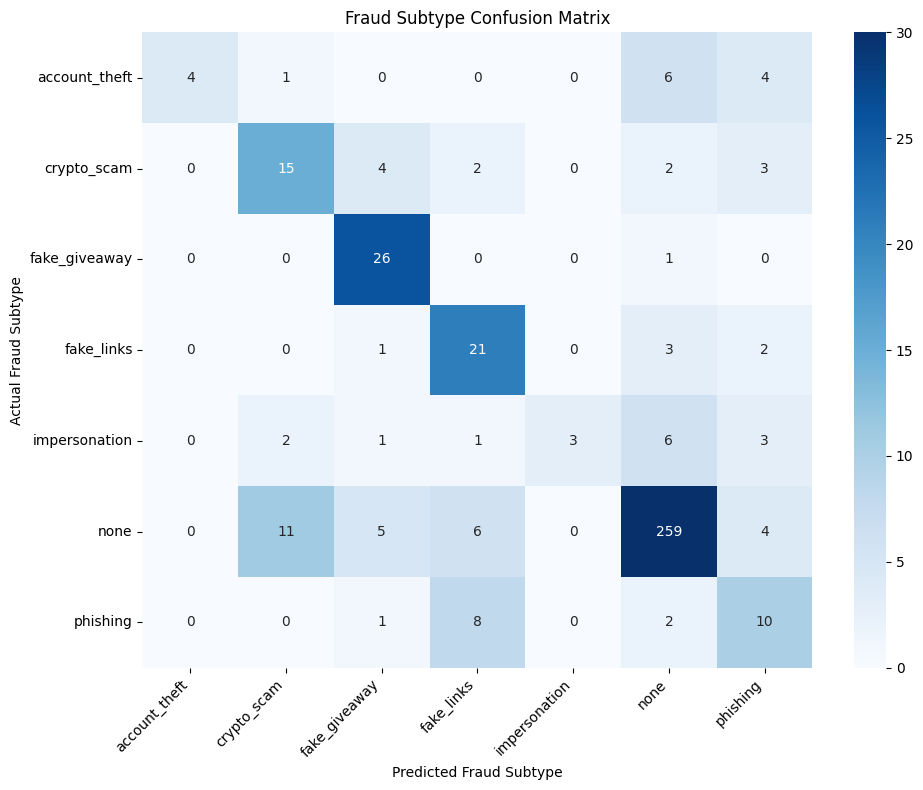

In [15]:
# Create a prettier confusion matrix with matplotlib and sklearn
# Get unique classes for fraud subtypes
fraud_classes = sorted(df['actual_fraud_subtype'].unique())

# Create confusion matrix
fraud_cm = confusion_matrix(df['actual_fraud_subtype'], df['predicted_fraud_subtype'], labels=fraud_classes)

# Create figure and axis
plt.figure(figsize=(10, 8))

# Create heatmap with max color value of 20
sns.heatmap(fraud_cm, annot=True, fmt='d', cmap='Blues', vmax=30,
            xticklabels=fraud_classes,
            yticklabels=fraud_classes)

# Add labels and title
plt.xlabel('Predicted Fraud Subtype')
plt.ylabel('Actual Fraud Subtype')
plt.title('Fraud Subtype Confusion Matrix')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()
